<h1>Show Metrics for Classifier</h1>

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rnd
from fau_colors import cmaps
from matplotlib import patches as mpatches
colors = cmaps.faculties_all

In [9]:
# def random func
random_scores = lambda l: [rnd.random() for _ in range(l)]

# defines some constants
zoos = [['Nürnberg', 0, 1], ['Berlin', 2, 3], ['Schönbrunn', 4, 5], ['Mulhouse', 6, 7]]
metrics = ['Accuracy', 'Precision', 'Recall', 'F1']

In [4]:
# use a test data frame
# classi_df = pd.DataFrame([
#     [0, 'Accuracy'] + random_scores(13),
#     [1, 'Accuracy'] + random_scores(13),
#     [2, 'Accuracy'] + random_scores(13),
#     [3, 'Accuracy'] + random_scores(13),
#     [4, 'Accuracy'] + random_scores(13),
#     [0, 'Precision'] + random_scores(13),
#     [1, 'Precision'] + random_scores(13),
#     [2, 'Precision'] + random_scores(13),
#     [3, 'Precision'] + random_scores(13),
#     [4, 'Precision'] + random_scores(13),
#     [0, 'Recall'] + random_scores(13),
#     [1, 'Recall'] + random_scores(13),
#     [2, 'Recall'] + random_scores(13),
#     [3, 'Recall'] + random_scores(13),
#     [4, 'Recall'] + random_scores(13),
#     [0, 'F1'] + random_scores(13),
#     [1, 'F1'] + random_scores(13),
#     [2, 'F1'] + random_scores(13),
#     [3, 'F1'] + random_scores(13),
#     [4, 'F1'] + random_scores(13)
#     ], columns=['Fold', 'Metric', 'All'] + [str(i) for i in range(8)] + zoos)

# classi_df

In [5]:
# use the real data frame
classi_df = pd.read_csv('../Classifier_Results.csv', index_col='IDX')
# sort by given metrics
classi_df['Metric_Num'] = classi_df['Metric'].apply(lambda m: metrics.index(m))
classi_df.sort_values(['Metric_Num', 'Fold'], inplace=True)
classi_df

,Fold,Metric,All,0,1,2,3,4,5,6,7,Nürnberg,Berlin,Schönbrunn,Mulhouse,Metric_Num
IDX,,,,,,,,,,,,,,,,
0,0,Accuracy,0.862903,1.000000,0.937500,0.562500,0.769231,0.882353,0.894737,1.000000,0.666667,0.97619,0.655172,0.888889,0.882353,0
4,1,Accuracy,0.838710,1.000000,0.875000,0.625000,0.615385,0.722222,0.947368,0.909091,1.000000,0.95122,0.620690,0.837838,0.941176,0
8,2,Accuracy,0.870968,1.000000,1.000000,0.625000,0.666667,0.777778,0.947368,1.000000,0.833333,1.00000,0.642857,0.864865,0.944444,0
12,3,Accuracy,0.894309,1.000000,0.937500,0.733333,0.666667,0.823529,1.000000,0.916667,1.000000,0.97561,0.703704,0.916667,0.947368,0
16,4,Accuracy,0.878049,1.000000,0.875000,0.866667,0.750000,0.764706,0.947368,1.000000,0.571429,0.95122,0.814815,0.861111,0.842105,0
1,0,Precision,0.862903,0.962963,1.000000,0.750000,0.588235,0.882353,0.894737,0.846154,1.000000,0.97619,0.655172,0.888889,0.882353,1
5,1,Precision,0.838710,0.925926,1.000000,0.666667,0.571429,0.928571,0.782609,1.000000,0.857143,0.95122,0.620690,0.837838,0.941176,1
9,2,Precision,0.870968,1.000000,1.000000,0.714286,0.533333,0.933333,0.857143,0.923077,1.000000,1.00000,0.642857,0.864865,0.944444,1
13,3,Precision,0.894309,0.961538,1.000000,0.733333,0.666667,1.000000,0.863636,1.000000,0.875000,0.97561,0.703704,0.916667,0.947368,1


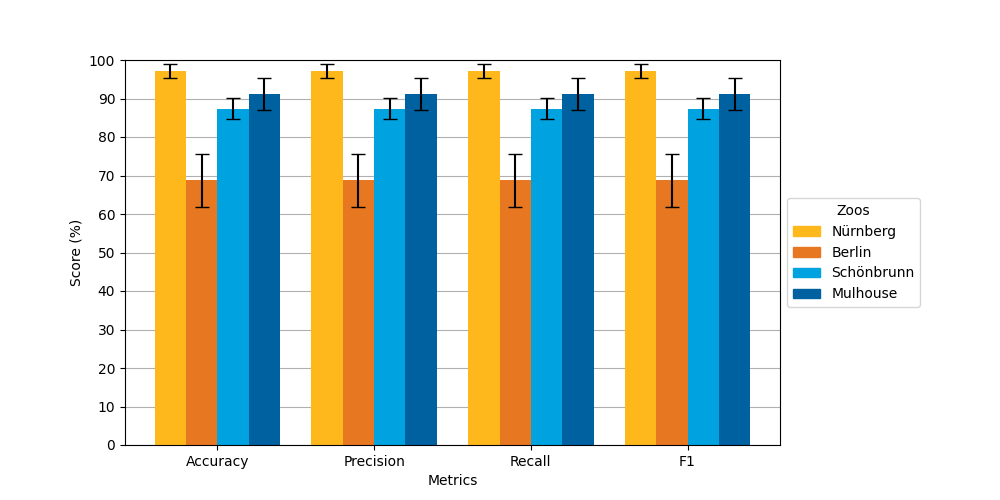

In [10]:
# zoo graph: weird all numbers same
legend_patches = []
c_counter = [4, 5, 6, 7]

# def graph
_, ax = plt.subplots(figsize=(10, 5))
plt.ylabel('Score (%)')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([i / 100 for i in range(0, 101, 10)])
ax.set_yticklabels(range(0, 101, 10))
ax.set_axisbelow(True)
plt.xlabel("Metrics")
plt.grid(axis='y')
ax.set_xticks(range(4))
ax.set_xticklabels(metrics)

# set data
off = np.array([-0.3, -0.1, 0.1, 0.3])
i = np.array(range(4))
std = classi_df.groupby('Metric', as_index=False).std(ddof=0)
mean = classi_df.groupby('Metric', as_index=False, sort=False).mean()
# mean

for idx, v in enumerate(zoos):
    v = v[0]
    v_mean = mean[v].values
    v_std = std[v].values
    plt.bar(i + off[idx], v_mean, yerr=v_std, align='center', width=0.2, color=colors[c_counter[idx]],
            ecolor='black', capsize=5)
    legend_patches.append(mpatches.Patch(color=colors[c_counter[idx]], label=f'{v}'))

plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Zoos')
plt.subplots_adjust(right=0.78)

plt.show()

,Metric,Fold,All,0,1,2,3,4,5,6,7,Nürnberg,Berlin,Schönbrunn,Mulhouse,Metric_Num
0,Accuracy,2.0,0.868988,1.000000,0.92500,0.682500,0.693590,0.794118,0.947368,0.965152,0.814286,0.970848,0.687448,0.873874,0.91149,0.0
1,Precision,2.0,0.868988,0.955271,1.00000,0.735357,0.621933,0.948852,0.843261,0.913846,0.946429,0.970848,0.687448,0.873874,0.91149,1.0
2,Recall,2.0,0.868988,1.000000,0.92500,0.682500,0.693590,0.794118,0.947368,0.965152,0.814286,0.970848,0.687448,0.873874,0.91149,2.0
3,F1,2.0,0.868988,0.976920,0.96043,0.705346,0.653704,0.862646,0.891352,0.934892,0.858555,0.970848,0.687448,0.873874,0.91149,3.0


[0.9625     0.97763533 0.9625     0.96867517]
[0.68804487 0.67864496 0.68804487 0.67952466]
[0.87074303 0.89605643 0.87074303 0.8769988 ]
[0.88971861 0.93013736 0.88971861 0.89672321]


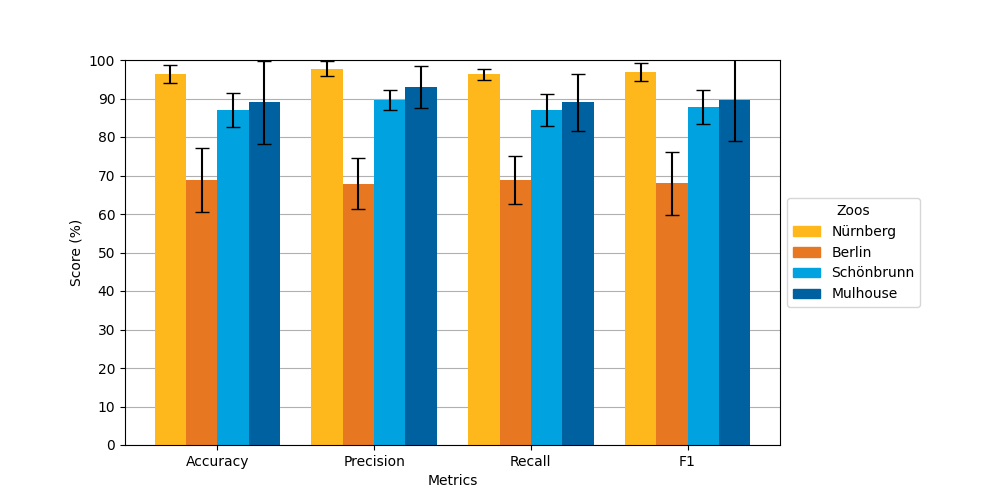

In [25]:
# animal graph meaned over zoos
legend_patches = []
c_counter = [4, 5, 6, 7]

# def graph
_, ax = plt.subplots(figsize=(10, 5))
plt.ylabel('Score (%)')
ax.set_ylim([0.0, 1.0])
ax.set_yticks([i / 100 for i in range(0, 101, 10)])
ax.set_yticklabels(range(0, 101, 10))
ax.set_axisbelow(True)
plt.xlabel("Metrics")
plt.grid(axis='y')
ax.set_xticks(range(4))
ax.set_xticklabels(metrics)

# set data
off = np.array([-0.3, -0.1, 0.1, 0.3])
i = np.array(range(4))
std = classi_df.groupby('Metric', as_index=False).std(ddof=0)
mean = classi_df.groupby('Metric', as_index=False, sort=False).mean()
display(mean)

for idx, z in enumerate(zoos):
    z_mean = mean[[str(z[1]), str(z[2])]].mean(axis=1).values
    z_std = std[[str(z[1]), str(z[2])]].mean(axis=1).values
    print(z_mean)
    
    plt.bar(i + off[idx], z_mean, yerr=z_std, align='center', width=0.2, color=colors[c_counter[idx]],
            ecolor='black', capsize=5)
    legend_patches.append(mpatches.Patch(color=colors[c_counter[idx]], label=f'{z[0]}'))

plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Zoos')
plt.subplots_adjust(right=0.78)

plt.show()